# Music Machine

Building on previous projects, I decided to see wheter it was possible to rebuild Spotify's popularity algorithm using Machine Learning. 


Spotify already calculates Popularity for each track using the methodology that follows- ie based on engagement with a song:


'The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.
The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.'


However, I am going to calculate this based on the audio features and attributes of each track to see in further reasearch if we can distill what components determine the perfect song. 

If you'd like to run this notebook, you can find the dataset here (https://drive.google.com/file/d/1A3kRkiciCvJDJdUfWUkjzo91O_rXxEdv/view?usp=sharing) - please download it and place it in the 'data' folder. 

### Pulling the data

First I imported my libraries, and completed my setup to pull the data I needed from the Spotify API. 

In [1]:
import spotipy.util as utilm  
import spotipy
import os.path as path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import timeit

username = 'ninahew'
client_id ='a758a8092e3b45949388c4123f79948f'
client_secret = '9852f1ad63d64a4284bf4496e1bd2115'
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played'
user_id = 'spotify:user:ninahew'

from spotipy.oauth2 import SpotifyClientCredentials

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, 
                                                                              client_secret=client_secret))

I was keen to start right away so immediately pulled the back catalgoue of my favourite band, the Pet Shop Boys, with the intention to experiment with models using this and add more data later on. 

In [416]:
# psb_uri = 'spotify:artist:2ycnb8Er79LoH2AsR5ldjh'

In [417]:
# psb_search = spotify.search(q='pet shop boys', type='artist')
# psb_id = psb_search['artists']['items'][0]['id']
# psb_id

In [418]:
# df = pd.DataFrame()
# filepath = "../data/PSB data.csv"
# if not path.exists(filepath):
#     artist = psb_id
#     albums = spotify.artist_albums(artist)
#     for album in albums['items']:
#         tracks = spotify.album_tracks(album['id'])
#         for track in tracks['items']:
#                 full_track = spotify.track(track['id'])
#                 audio_features = spotify.audio_features(track['id'])[0]
#                 audio_features['track_name'] = track['name']
#                 audio_features['album_name'] = album['name']
#                 audio_features['album_type'] = album['album_type']
#                 audio_features['artist'] = ', '.join(sorted([artist['name'] for artist in track['artists']]))
#                 audio_features['release_date'] = album['release_date']
#                 audio_features['popularity'] = full_track['popularity']
#                 df = df.append(audio_features, ignore_index=True)
#         df.to_csv(path_or_buf = filepath)
# else:
#     df = pd.read_csv(filepath)
    
# df.sample(3)

However, even though this is how I benchmark my personal music collection, I figured that this would introduce a lot of bias and so I quickly decided to randomise this a bit more.


I did this by finding a playlist called BEST SONGS OF ALL TIME created by a random spotify user (rather than a Spotify generated one) as I beleived this would help to eliminate bias and offer an impartial list of songs on which to train the models. 

In [419]:
# best_songs_uri = 'spotify:playlist:0gqrnk12Q8OExuCeKyBRCq'
# best_songs = spotify.search(q = 'BEST SONGS OF ALL TIME', limit=50, offset=0, type='playlist', market=None)
# best_songs_id = best_songs['playlists']['items'][0]['id']
# best_songs_id

In [420]:

# i = 0
# tracks = spotify.playlist_tracks(best_songs_id, offset = i, limit=100)['items']
# best_songs_list = []
# best_songs_list = tracks

# while len(tracks) == 100:
#     i = i + 100
#     tracks = spotify.playlist_tracks(best_songs_id, offset = i, limit=100)['items']
#     best_songs_list = best_songs_list + tracks

# best_songs_list
   

I've kept some of the code here for if I was to pull the artists/albums/track names for this playlist, however for the purposes of my models, this wouldnt be necessary. 

In [421]:
# track_ids = [track['track']['id'] for track in best_songs_list]
# best_songs_df = pd.DataFrame()

# for track_id in track_ids:
#     full_track = spotify.track(track_id)
#     audio_features = spotify.audio_features(track_id)[0]
# ##     audio_features['track_name'] = track['name']
# ##     audio_features['album_name'] = album['name']
# ##     audio_features['album_type'] = album['album_type']
# ##     audio_features['artist'] = ', '.join(sorted([artist['name'] for artist in track['artists']]))
# ##     audio_features['release_date'] = album['release_date']
#     audio_features['popularity'] = full_track['popularity']
#     best_songs_df = best_songs_df.append(audio_features, ignore_index=True)

In [422]:
# len(best_songs_df)

In [423]:
# best_songs_df.head()

In [424]:
# best_songs_df.columns

The dataset is pretty clean already, so I took the time to drop any text based columns, and also time signature because there will not be a lot of variation in the values. 

In [425]:
# best_songs_df.drop(columns= ['analysis_url', 'track_href', 'type', 'uri'], inplace = True)
# best_songs_df.drop(columns='id', inplace = True)
# best_songs_df.drop(columns = ['time_signature'], inplace = True)
# # best_songs_df.drop(columns = 'Unnamed: 0', inplace = True)

In [426]:
best_songs_df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence'],
      dtype='object')

I started work on this project using only the above data, but it quickly became clear that this was not enough to make meaningful insights. In order to source more data in a similarly random fashion, i sought out NPO radio's top 200 tracks from 2019 and added them to the data I had already collected. 

In [427]:
# songs_2000 = spotify.search(q = 'Top 2000', limit=50, offset=0, type='playlist', market=None)
# songs_2000_id = songs_2000['playlists']['items'][1]['id']
# songs_2000_id


In [428]:
# i = 0
# tracks_2000 = spotify.playlist_tracks(songs_2000_id, offset = i, limit=100)['items']
# songs_2000_list = []
# songs_2000_list = tracks_2000

# while len(tracks_2000) == 100:
#     i = i + 100
#     tracks_2000 = spotify.playlist_tracks(songs_2000_id, offset = i, limit=100)['items']
#     songs_2000_list = songs_2000_list + tracks

# songs_2000_list



In [429]:
# track_2000_ids = [track['track']['id'] for track in songs_2000_list]
# songs_2000_df = pd.DataFrame()

# for track_id in track_2000_ids:
#     full_track_2000 = spotify.track(track_id)
#     audio_features_2000 = spotify.audio_features(track_id)[0]
#    # audio_features['track_name'] = track['name']
# #     audio_features['album_name'] = album['name']
# #     audio_features['album_type'] = album['album_type']
# #     audio_features['artist'] = ', '.join(sorted([artist['name'] for artist in track['artists']]))
# #     audio_features['release_date'] = album['release_date']
#     audio_features_2000['popularity'] = full_track_2000['popularity']
#     songs_2000_df = songs_2000_df.append(audio_features_2000, ignore_index=True)

In [430]:
# len(songs_2000_df)

In [431]:
# songs_2000_df.head()

In [432]:
# songs_2000_df.columns

In [433]:
# songs_2000_df.drop(columns= ['analysis_url', 'track_href', 'type', 'uri'], inplace = True)
# songs_2000_df.drop(columns='id', inplace = True)
# songs_2000_df.drop(columns = ['time_signature'], inplace = True)
# # best_songs_df.drop(columns = 'Unnamed: 0', inplace = True)

In [434]:
# songs_2000_df.columns

In [435]:
# frames = [best_songs_df, songs_2000_df]
# master_df = pd.concat(frames)
# master_df.head()

In [436]:
# master_df.to_csv('../data/Songs Data', index = False)

In [2]:
master_df = pd.read_csv('../data/Songs Data')
# master_df.head()
master_df.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence'],
      dtype='object')

In [3]:
master_df.drop(columns = 'Unnamed: 0', inplace = True)
master_df.sample(5)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
846,0.1450,0.733,239600.0,0.710,0.11500,5.0,0.0956,-5.849,0.0,84.0,0.0292,127.975,0.965
159,0.3030,0.867,304600.0,0.646,0.00000,1.0,0.2790,-4.674,0.0,76.0,0.2880,88.634,0.670
1280,0.0430,0.666,510933.0,0.667,0.00050,2.0,0.0740,-9.305,0.0,74.0,0.0371,134.219,0.679
430,0.0674,0.749,304507.0,0.699,0.00192,1.0,0.0763,-13.108,1.0,68.0,0.0371,128.904,0.935
1557,0.0137,0.669,245400.0,0.633,0.01780,2.0,0.0979,-11.903,0.0,59.0,0.0490,90.626,0.862


### Normalizing the data

The audio features are categorised in a variety of different ways in this dataset. Popularity is between 0 and 100, keys are assigned an integer which represent each one, Mode (major/minor) is represented with 0 and 1, and Loudness is measured in decibels. However the majority of the measures are already normalised, ie they are scaled between 0 and 1. 


For this reason, I decided to normalise the whole dataset to bring them all in line.
I experimented a little with normalizing vs standardizing when I was building my models, but not to the extent that I'd have liked, so i'd like to revist this at a later date. 

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
# scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(master_df), columns = master_df.columns)
df_normalized.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
0,0.117515,0.660241,0.126021,0.791181,0.000529,0.818182,0.167274,0.686420,1.0,0.034884,0.019231,0.425517,1.000000
1,0.004183,0.932530,0.372158,0.952238,0.856853,0.090909,0.028105,0.858822,1.0,0.383721,0.457594,0.439651,0.258078
2,0.041019,0.700000,0.106639,0.850050,0.000000,1.000000,0.061934,0.796897,1.0,0.000000,0.021943,0.277187,0.776786
3,0.104112,0.826506,0.204419,0.655670,0.000000,0.454545,0.114188,0.925223,1.0,0.000000,0.398422,0.209805,0.838435
4,0.089989,0.715663,0.226971,0.743419,0.000000,0.000000,0.506610,0.773145,1.0,0.023256,0.010108,0.439178,0.606718


In [5]:
df_normalized.dtypes

acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
mode                float64
popularity          float64
speechiness         float64
tempo               float64
valence             float64
dtype: object

I did a quick check to see whether there was any multicollinearity, and whether I could drop any of the columns as a result. There was a strong negative correlation between accousticness and energy/loudness which makse sense, but for the time being I've opted to keep them in. 

<AxesSubplot:>

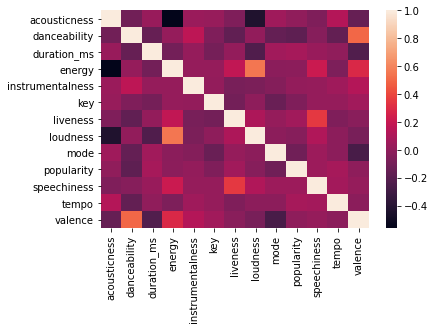

In [6]:
import seaborn as sns
sns.heatmap(df_normalized.corr())

In [7]:
X = df_normalized[['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence']]
y = df_normalized['popularity']

In [8]:
print(len(X))
print(len(y))

1680
1680


### Linear Regression

I started off with a linear regression, and decided to also measure the run time of each of my models to add another metric that could measure the effectiveness of each one. 


To measure each model, I am going to rely on the mean squared error and its relation to the root mean squared error. 

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
from sklearn.linear_model import LinearRegression
import time
linear_model = LinearRegression()
linear_train_start = time.time()
linear_model.fit(X_train,y_train).coef_ 
linear_train_stop= time.time()
linear_time = linear_train_stop - linear_train_start
print(linear_time)

0.019807100296020508


In [12]:
y_pred_linear = linear_model.predict(X_train)
linear_test = pd.DataFrame({'test':y_train, 'predicted':y_pred_linear})
linear_test.head()

,test,predicted
1635,0.779070,0.745306
526,0.918605,0.680460
1376,0.872093,0.684432
221,0.662791,0.680372
113,0.000000,0.651555


In [13]:
from sklearn.metrics import mean_absolute_error
import math

mae_linear_train = mean_absolute_error(y_train, y_pred_linear)
mae_linear_train

0.16580661304564243

In [15]:
from sklearn.metrics import mean_squared_error
rmse_linear_train = math.sqrt(mean_squared_error(y_train, y_pred_linear))
rmse_linear_train

0.24296179276667404

In [16]:
y_pred_linear = linear_model.predict(X_test)
linear_test = pd.DataFrame({'test':y_test, 'predicted':y_pred_linear})
linear_test.head()

,test,predicted
1603,0.813953,0.731104
482,0.872093,0.814281
203,0.837209,0.728863
49,0.011628,0.680460
937,0.883721,0.760501


In [17]:
mae_linear_test = mean_absolute_error(y_test, y_pred_linear)
mae_linear_test

0.1695575483945633

In [18]:
rmse_linear_test = math.sqrt(mean_squared_error(y_test, y_pred_linear))
rmse_linear_test

0.24159387560685405

I started to look into the coefficints to see whether it was possible to determine the weighting of each audio feature on popularity, but this is something I'd like to revisit in a future project, because from my results, I wasn't too sure that Linear Regression would be the best model to use. I've included here for completeness nonetheless. 

In [19]:
coefs = linear_model.fit(X_train,y_train).coef_
coefs_df = pd.DataFrame(coefs)
coefs_df

,0
0,-0.042913
1,-0.405233
2,0.167986
3,-0.116389
4,0.060188
5,-0.087465
6,0.057953
7,0.013078
8,-0.072919
9,0.067928


In [20]:
attributes = list(df_normalized.columns)
attributes.remove('popularity')
coefs_df['attributes'] = attributes
coefs_df.columns = ['coefs', 'attributes']
coefs_df

,coefs,attributes
0,-0.042913,acousticness
1,-0.405233,danceability
2,0.167986,duration_ms
3,-0.116389,energy
4,0.060188,instrumentalness
5,-0.087465,key
6,0.057953,liveness
7,0.013078,loudness
8,-0.072919,mode
9,0.067928,speechiness


<AxesSubplot:xlabel='Attributes', ylabel='Coefficient'>

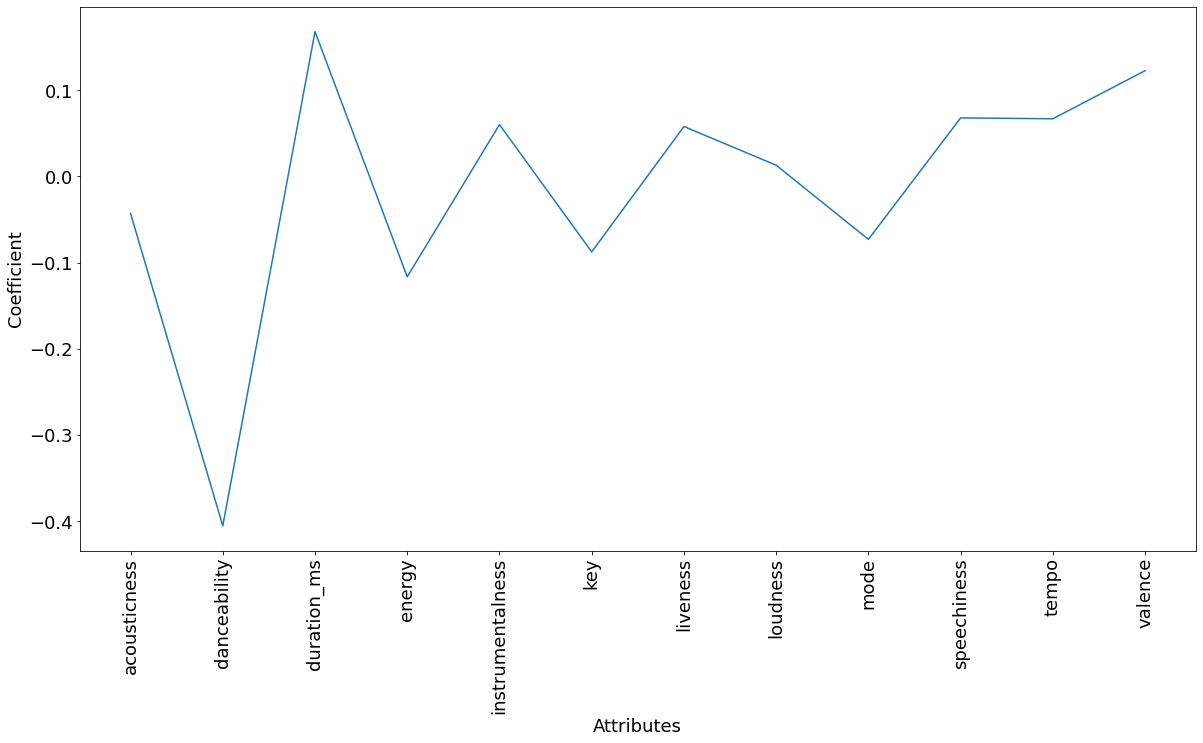

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.xlabel('Attributes', fontsize=18)
plt.ylabel('Coefficient', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xticks(rotation='vertical')


sns.lineplot(data = coefs_df, x = 'attributes', y = 'coefs', palette = 'husl')

### Decision Tree

Next up I used a decision tree. I was impressed with the results on the training data, but not so much on the test data. This is because Decision Trees are prone to overfitting, and so it performed exceptionally well because it overfit on the train data and then that negatively impacted the results on the test data. 

In [24]:
from sklearn import tree

In [25]:
tree_model = tree.DecisionTreeRegressor(splitter = 'random', max_depth = 500)
tree_time_start = time.time()
tree_model.fit(X_train,y_train)
tree_time_stop = time.time()
tree_time = tree_time_stop - tree_time_start
y_pred_tree = tree_model.predict(X_train)
tree_train = pd.DataFrame({'train':y_train, 'predicted':y_pred_tree})
# tree.plot_tree(tree_model)
print(tree_time)
tree_train.head()

0.009335041046142578


,train,predicted
1635,0.779070,0.779070
526,0.918605,0.918605
1376,0.872093,0.872093
221,0.662791,0.662791
113,0.000000,0.000000


In [26]:
mae_tree_train = mean_absolute_error(y_train, y_pred_tree)
mae_tree_train

0.0027850287401783246

In [27]:
rmse_tree_train = math.sqrt(mean_squared_error(y_train, y_pred_tree))
rmse_tree_train

0.03285487717820089

<AxesSubplot:xlabel='Songs', ylabel='Popularity'>

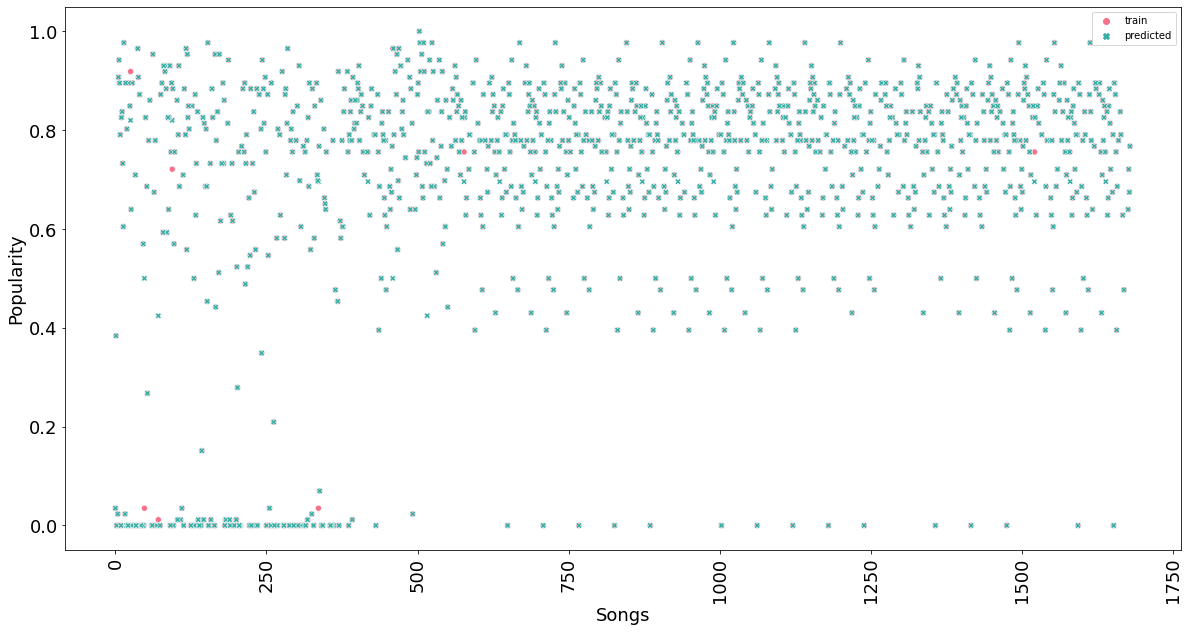

In [28]:
plt.figure(figsize=(20,10))
plt.xlabel('Songs', fontsize=18)
plt.ylabel('Popularity', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xticks(rotation='vertical')



sns.scatterplot(data = tree_train, palette = 'husl')

In [29]:
y_pred_tree = tree_model.predict(X_test)

tree_test = pd.DataFrame({'train':y_test, 'predicted':y_pred_tree})
tree_test.head()

,train,predicted
1603,0.813953,0.813953
482,0.872093,0.872093
203,0.837209,0.151163
49,0.011628,0.918605
937,0.883721,0.883721


In [30]:
mae_tree_test = mean_absolute_error(y_test, y_pred_tree)
mae_tree_test

0.11430647840531567

In [31]:
rmse_tree_test = math.sqrt(mean_squared_error(y_test, y_pred_tree))
rmse_tree_test

0.28192286649482073

<AxesSubplot:xlabel='Songs', ylabel='Popularity'>

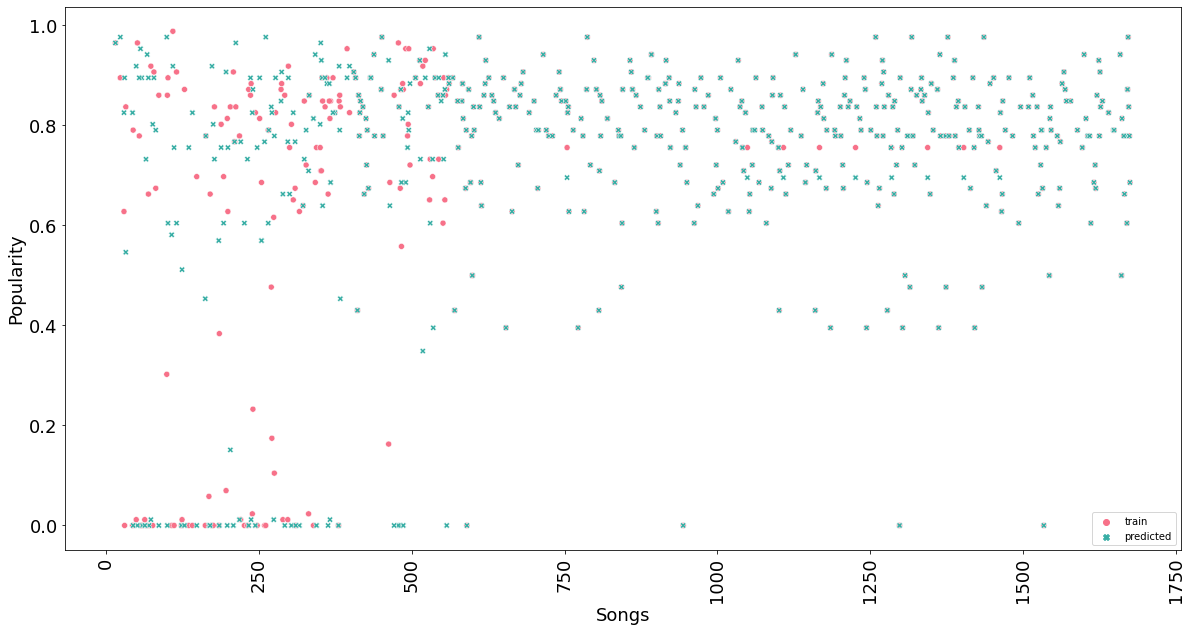

In [32]:
plt.figure(figsize=(20,10))
plt.xlabel('Songs', fontsize=18)
plt.ylabel('Popularity', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xticks(rotation='vertical')



sns.scatterplot(data = tree_test, palette = 'husl')

### Random Forest

Given my previous results on the Decision Tree, I thought a Random Forest might be more successful. Random Forests are less prone to overfitting, so I was expecting better results!

In [33]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(n_estimators = 300)
forest_time_start = time.time()
forest_model.fit(X_train,y_train)
forest_time_stop = time.time()
forest_time = forest_time_stop - forest_time_start
y_pred_forest = forest_model.predict(X_train)
forest_train = pd.DataFrame({'train':y_train, 'predicted':y_pred_forest})

print(forest_time)
forest_train.head()

2.098641872406006


,train,predicted
1635,0.779070,0.779070
526,0.918605,0.835504
1376,0.872093,0.872093
221,0.662791,0.470853
113,0.000000,0.225543


In [34]:
mae_forest_train = mean_absolute_error(y_train, y_pred_forest)
mae_forest_train

0.0362444665890909

In [35]:
rmse_forest_train = math.sqrt(mean_squared_error(y_train, y_pred_forest))
rmse_forest_train

0.08192171554769186

In [36]:
y_pred_forest = forest_model.predict(X_test)

forest_test = pd.DataFrame({'test':y_test, 'predicted':y_pred_forest})
forest_test.head()

,test,predicted
1603,0.813953,0.813953
482,0.872093,0.827519
203,0.837209,0.563450
49,0.011628,0.835504
937,0.883721,0.883721


In [37]:
mae_forest_test = mean_absolute_error(y_test, y_pred_forest)
mae_forest_test

0.09150011143905686

In [38]:
rmse_forest_test = math.sqrt(mean_squared_error(y_test, y_pred_forest))
rmse_forest_test

0.20240141290569652

<AxesSubplot:xlabel='Songs', ylabel='Popularity'>

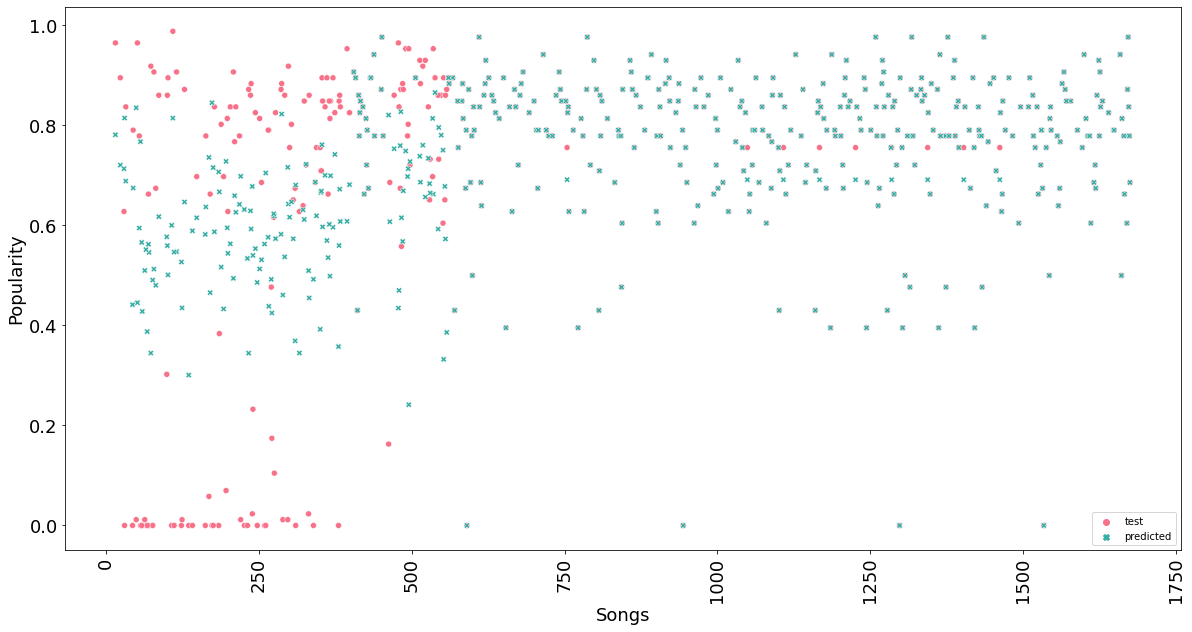

In [39]:
plt.figure(figsize=(20,10))
plt.xlabel('Songs', fontsize=18)
plt.ylabel('Popularity', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xticks(rotation='vertical')



sns.scatterplot(data = forest_test, palette = 'husl')

### Ada Boost

I thought it wise to push myself to use a new regressor thich I hadn't encountered before, so I went for Ada Boost. This model helps to combine multiple “weak classifiers” into a single “strong classifier”. 

In [40]:
from sklearn.ensemble import AdaBoostRegressor

In [41]:
ada_model = AdaBoostRegressor()
ada_time_start = time.time()
ada_model.fit(X_train,y_train)
ada_time_stop = time.time()
ada_time = ada_time_stop - ada_time_start
y_pred_ada = ada_model.predict(X_train)
ada_train = pd.DataFrame({'train':y_train, 'predicted':y_pred_ada})
print(ada_time)
# ada_train

0.05317115783691406


In [42]:
mae_ada_train = mean_absolute_error(y_train, y_pred_ada)
mae_ada_train

0.17576315189837577

In [43]:
rmse_ada_train = math.sqrt(mean_squared_error(y_train, y_pred_ada))
rmse_ada_train

0.22588482476806102

In [44]:
y_pred_ada = ada_model.predict(X_test)

ada_test = pd.DataFrame({'test':y_test, 'predicted':y_pred_ada})
# ada_test

In [45]:
mae_ada_test = mean_absolute_error(y_test, y_pred_ada)
mae_ada_test

0.18977308013599267

In [46]:
rmse_ada_test = math.sqrt(mean_squared_error(y_test, y_pred_ada))
rmse_ada_test

0.23787848120583735

### MLP Regressor

Finally, I decided to use a neural network and see how effective this would be. The data is extremely non linear so I sensed that this could be a good option for what I was looking to do. 

In [47]:
from sklearn.neural_network import MLPRegressor

In [48]:
mlp_model = MLPRegressor()
mlp_time_start = time.time()
mlp_model.fit(X_train,y_train)
mlp_time_stop = time.time()
mlp_time = mlp_time_stop - mlp_time_start
y_pred_mlp = mlp_model.predict(X_train)
mlp_train = pd.DataFrame({'train':y_train, 'predicted':y_pred_mlp})
print(mlp_time)
mlp_train.head()

1.035834789276123


,train,predicted
1635,0.779070,0.781747
526,0.918605,0.607967
1376,0.872093,0.757492
221,0.662791,0.687344
113,0.000000,0.500915


<AxesSubplot:xlabel='Songs', ylabel='Popularity'>

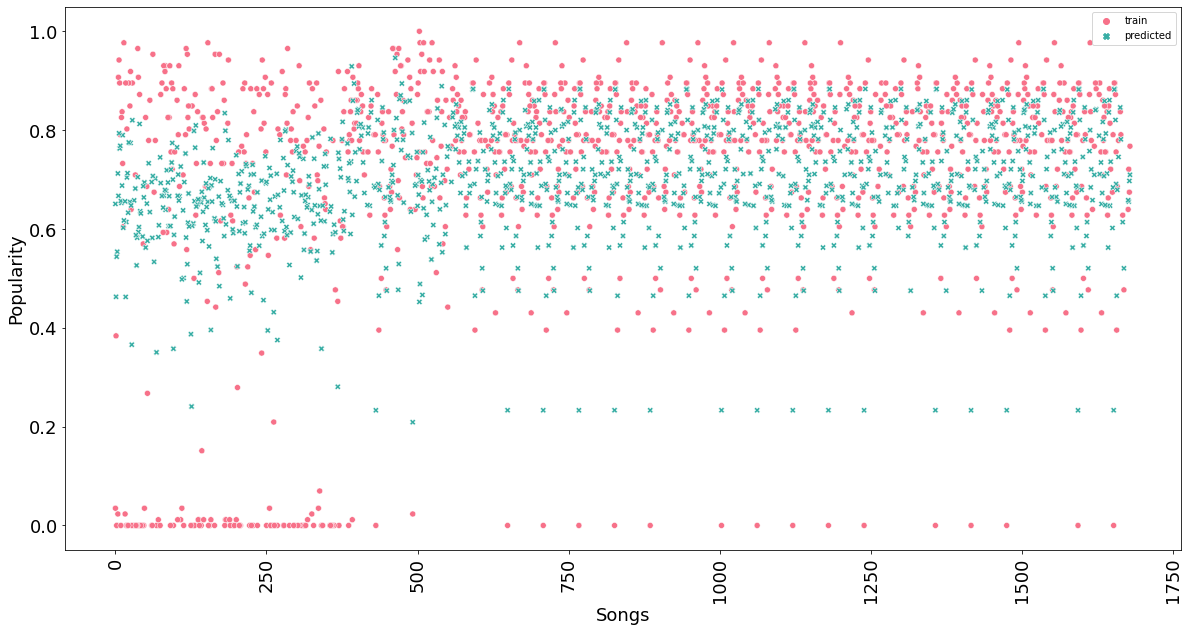

In [49]:
plt.figure(figsize=(20,10))
plt.xlabel('Songs', fontsize=18)
plt.ylabel('Popularity', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xticks(rotation='vertical')

sns.scatterplot(data = mlp_train, palette = 'husl')

In [50]:
mae_mlp_train = mean_absolute_error(y_train, y_pred_mlp)
mae_mlp_train

0.12995551850143974

In [51]:
rmse_mlp_train = math.sqrt(mean_squared_error(y_train, y_pred_mlp))
rmse_mlp_train

0.21111460729390538

In [52]:
y_pred_mlp = mlp_model.predict(X_test)
mlp_test = pd.DataFrame({'test':y_test, 'predicted':y_pred_mlp})
mlp_test.head()

,test,predicted
1603,0.813953,0.737488
482,0.872093,0.812504
203,0.837209,0.642563
49,0.011628,0.607967
937,0.883721,0.860646


In [53]:
mae_mlp_test = mean_absolute_error(y_test, y_pred_mlp)
mae_mlp_test

0.13870807637832905

In [54]:
rmse_mlp_test = math.sqrt(mean_squared_error(y_test, y_pred_mlp))
rmse_mlp_test

0.2184023148018551

### Tuning 

I was impressed with the results of this model, so I decided to do some tuning to see whether I could further improve the MAE/RMSE. To save space, I tweaked the model over and over and stored the results in the data frame below. 

In [55]:
mlp_model_8 = MLPRegressor(activation = 'relu', max_iter = 400)
mlp_time_start_8 = time.time()
mlp_model_8.fit(X_train,y_train)
mlp_time_stop_8 = time.time()
mlp_time_8 = mlp_time_stop_8 - mlp_time_start_8
y_pred_mlp_8 = mlp_model_8.predict(X_train)
mlp_train_8 = pd.DataFrame({'train':y_train, 'predicted':y_pred_mlp_8})
print(mlp_time_8)
# mlp_train_2

0.6957390308380127


In [56]:
mae_mlp_train_8 = mean_absolute_error(y_train, y_pred_mlp_8)
print(mae_mlp_train_8)
rmse_mlp_train_8 = math.sqrt(mean_squared_error(y_train, y_pred_mlp_8))
print(rmse_mlp_train_8)


0.15061074920191297
0.23075806514471361


In [57]:
y_pred_mlp_8 = mlp_model_8.predict(X_test)
mlp_test_8 = pd.DataFrame({'test':y_test, 'predicted':y_pred_mlp_8})
# mlp_test_3

In [58]:
mae_mlp_test_8 = mean_absolute_error(y_test, y_pred_mlp_8)
print(mae_mlp_test_8)
rmse_mlp_test_8 = math.sqrt(mean_squared_error(y_test, y_pred_mlp_8))
print(rmse_mlp_test_8)

0.15536773972047563
0.23194308097771696


In [59]:
# parameter_tuning = pd.DataFrame(columns = ['Run Time', 'MAE Train', 'RMSE Train', 'MAE Test', 'RMSE Test', 'Notes'])

# parameter_tuning.loc[0] = [mlp_time, mae_mlp_train, rmse_mlp_train, mae_mlp_test, rmse_mlp_test, 'Default settings - activation = relu']
# parameter_tuning.loc[1] = [mlp_time_2, mae_mlp_train_2, rmse_mlp_train_2, mae_mlp_test_2, rmse_mlp_test_2, 'activation = identity ']
# parameter_tuning.loc[2] = [mlp_time_3, mae_mlp_train_3, rmse_mlp_train_3, mae_mlp_test_3, rmse_mlp_test_3, 'activation = logistic ']
# parameter_tuning.loc[3] = [mlp_time_4, mae_mlp_train_4, rmse_mlp_train_4, mae_mlp_test_4, rmse_mlp_test_4, 'activation = tanh ']
# parameter_tuning.loc[4] = [mlp_time_5, mae_mlp_train_5, rmse_mlp_train_5, mae_mlp_test_5, rmse_mlp_test_5, 'activation = relu, learning rate = 0.1 ']
# parameter_tuning.loc[5] = [mlp_time_6, mae_mlp_train_6, rmse_mlp_train_6, mae_mlp_test_6, rmse_mlp_test_6, 'activation = relu, learning rate = 0.000001 ']
# parameter_tuning.loc[6] = [mlp_time_7, mae_mlp_train_7, rmse_mlp_train_7, mae_mlp_test_7, rmse_mlp_test_7, 'activation = relu, learning rate = 0.001, max_iter = 100 ']
# parameter_tuning.loc[7] = [mlp_time_8, mae_mlp_train_8, rmse_mlp_train_8, mae_mlp_test_8, rmse_mlp_test_8, 'activation = relu, learning rate = 0.001, max_iter = 400 ']





# parameter_tuning

In [60]:
# parameter_tuning.to_csv('../data/MLP tests')
parameter_tuning = pd.read_csv('../data/MLP tests')
parameter_tuning

,Unnamed: 0,Run Time,MAE Train,RMSE Train,MAE Test,RMSE Test,Notes
0,0,0.805703,0.112154,0.194087,0.136422,0.241118,Default settings - activation = relu
1,1,0.274130,0.165600,0.240164,0.183837,0.266853,activation = identity
2,2,0.300977,0.170171,0.246537,0.189343,0.276258,activation = logistic
3,3,0.422846,0.163045,0.239390,0.182664,0.267857,activation = tanh
4,4,0.604953,0.160870,0.234016,0.179733,0.262488,"activation = relu, learning rate = 0.1"
5,5,0.372995,0.148723,0.237513,0.168697,0.268688,"activation = relu, learning rate = 0.000001"
6,6,0.818487,0.130148,0.209238,0.152146,0.248177,"activation = relu, learning rate = 0.001, max_..."
7,7,0.755998,0.142400,0.220985,0.161994,0.251644,"activation = relu, learning rate = 0.001, max_..."


<AxesSubplot:xlabel='Iteration of Tuned Model', ylabel='MAE/RMSE'>

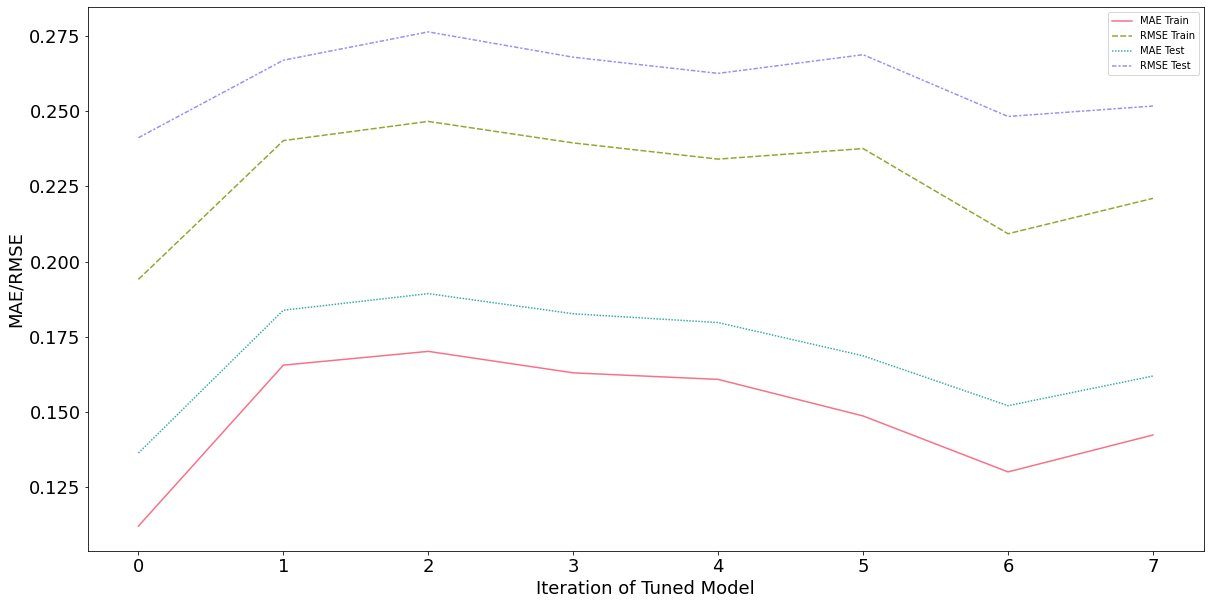

In [61]:
plt.figure(figsize=(20,10))
plt.xlabel('Iteration of Tuned Model', fontsize=18)
plt.ylabel('MAE/RMSE', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xticks(rotation='horizontal')

sns.lineplot(data = parameter_tuning[['MAE Train', 'RMSE Train', 'MAE Test', 'RMSE Test']], palette = 'husl')

From this, I found that the first (default) version of the model produced the best results. Even though the the second iteration of this model produced a smaller gap between the MAE and RMSE, ultimately the MAE was lowest on the first model. 

### Comparing the Models

Next, I evaluated the effectivness of the models. I plotted these to help visualize the results better. 

In [62]:
maes = pd.DataFrame(columns = ['Model','Test/Train','MAE'])
maes['Model'] = ['Linear','Linear','Decision Tree','Decision Tree', 'Random Forest', 'Random Forest', 'Ada Boost', 'Ada Boost','MLP','MLP']
maes['Test/Train'] = ['Train','Test','Train','Test','Train','Test','Train','Test', 'Train','Test']
maes['MAE'] = [mae_linear_train,mae_linear_test, mae_tree_train, mae_tree_test, mae_forest_train, mae_forest_test,mae_ada_train,mae_ada_test,mae_mlp_train, mae_mlp_test]

maes

,Model,Test/Train,MAE
0,Linear,Train,0.165807
1,Linear,Test,0.169558
2,Decision Tree,Train,0.002785
3,Decision Tree,Test,0.114306
4,Random Forest,Train,0.036244
5,Random Forest,Test,0.091500
6,Ada Boost,Train,0.175763
7,Ada Boost,Test,0.189773
8,MLP,Train,0.129956
9,MLP,Test,0.138708


<AxesSubplot:xlabel='Model', ylabel='MAE'>

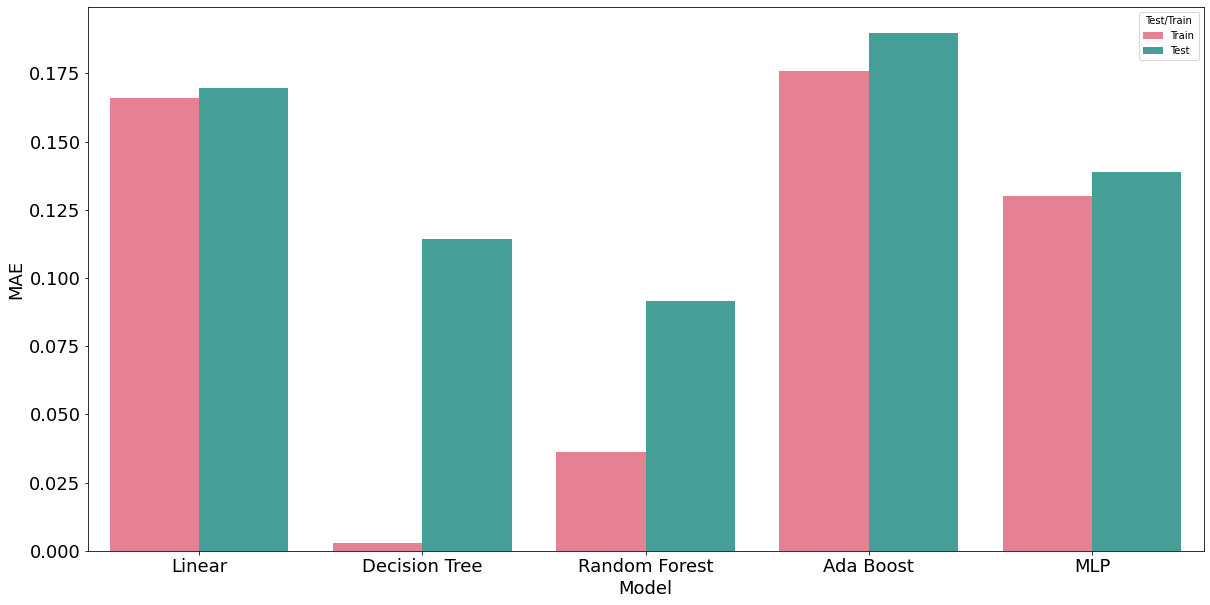

In [63]:
plt.figure(figsize=(20,10))
plt.xlabel('Model', fontsize=18)
plt.ylabel('MAE', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xticks(rotation='horizontal')

sns.barplot(data = maes, x = 'Model', y = 'MAE', hue = 'Test/Train', palette = 'husl')

Already, the Random Forest emerges as a front runner. The MAE is the lowest of all the models on the test data which means that when the model makes a prediction of popularity, it is off by an average of 0.1 each time. Keeping in mind the fact that the popularity (in this instance) is scored between 0 and 1, this is not bad at all. 


Likewise, this plot highlights the overfitting problem with the Decision Tree, as it performed very well on the train data compared to the test data. 


The MLP Regressor also shows a good MAE score so this could also be a contender. 



Next, Ill look at the RMSEs. I'm expecting them to follow a similar trend to the MAEs. 

In [64]:
rmses = pd.DataFrame()
rmses = pd.DataFrame(columns = ['Model','Test/Train','RMSE'])
rmses['Model'] = ['Linear','Linear','Decision Tree','Decision Tree', 'Random Forest', 'Random Forest', 'Ada Boost', 'Ada Boost','MLP','MLP']
rmses['Test/Train'] = ['Train','Test','Train','Test','Train','Test','Train','Test', 'Train','Test']
rmses['RMSE'] = [rmse_linear_train, rmse_linear_test, rmse_tree_train, rmse_tree_test, rmse_forest_train, rmse_forest_test, rmse_ada_train,rmse_ada_test,rmse_mlp_train, rmse_mlp_test]

rmses

,Model,Test/Train,RMSE
0,Linear,Train,0.242962
1,Linear,Test,0.241594
2,Decision Tree,Train,0.032855
3,Decision Tree,Test,0.281923
4,Random Forest,Train,0.081922
5,Random Forest,Test,0.202401
6,Ada Boost,Train,0.225885
7,Ada Boost,Test,0.237878
8,MLP,Train,0.211115
9,MLP,Test,0.218402


<AxesSubplot:xlabel='Model', ylabel='RMSE'>

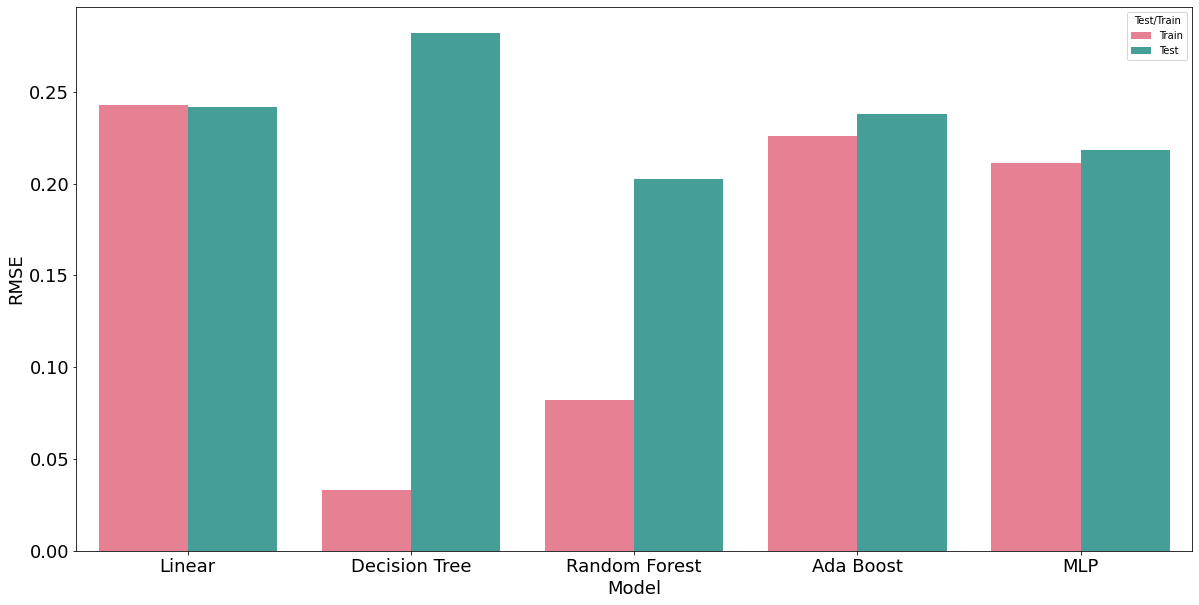

In [65]:
plt.figure(figsize=(20,10))
plt.xlabel('Model', fontsize=18)
plt.ylabel('RMSE', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xticks(rotation='horizontal')

sns.barplot(data = rmses, x = 'Model', y = 'RMSE', hue = 'Test/Train', palette = 'husl')

Indeed, this is in line with what I expected. The RMSES are generally close to the MAEs which shows that I don't have an enormous amount of heavy outliers that I need to take out (at this stage). 

I'll visualize these roughly for good measure. 

In [66]:
measures = maes
measures['RMSE'] = rmses['RMSE']
measures

,Model,Test/Train,MAE,RMSE
0,Linear,Train,0.165807,0.242962
1,Linear,Test,0.169558,0.241594
2,Decision Tree,Train,0.002785,0.032855
3,Decision Tree,Test,0.114306,0.281923
4,Random Forest,Train,0.036244,0.081922
5,Random Forest,Test,0.091500,0.202401
6,Ada Boost,Train,0.175763,0.225885
7,Ada Boost,Test,0.189773,0.237878
8,MLP,Train,0.129956,0.211115
9,MLP,Test,0.138708,0.218402


<AxesSubplot:xlabel='Model Test / Train', ylabel='MAE / RMSE'>

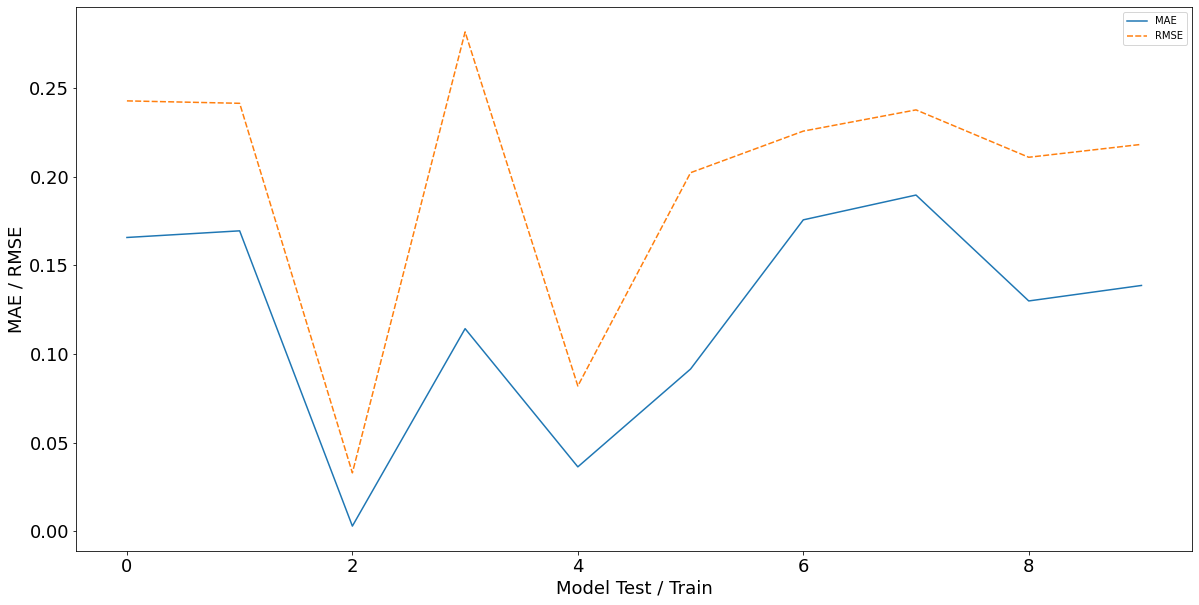

In [67]:
plt.figure(figsize=(20,10))
plt.xlabel('Model Test / Train', fontsize=18)
plt.ylabel('MAE / RMSE', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xticks(rotation='horizontal')
sns.lineplot(data = measures)

Next, I'm going to look at the run times for each model to give a real-world perspective on which of these would be best to use in a production setting. 

I imagine that the ones that scored best also took the longest to run.

In [68]:
run_times = pd.DataFrame()
run_times['Model'] = ['Linear', 'Decision Tree', 'Random Forest', 'Ada Boost', 'MLP']
run_times['Run times'] = [linear_time, tree_time, forest_time, ada_time, mlp_time]
run_times

,Model,Run times
0,Linear,0.019807
1,Decision Tree,0.009335
2,Random Forest,2.098642
3,Ada Boost,0.053171
4,MLP,1.035835


<AxesSubplot:xlabel='Model', ylabel='Run times'>

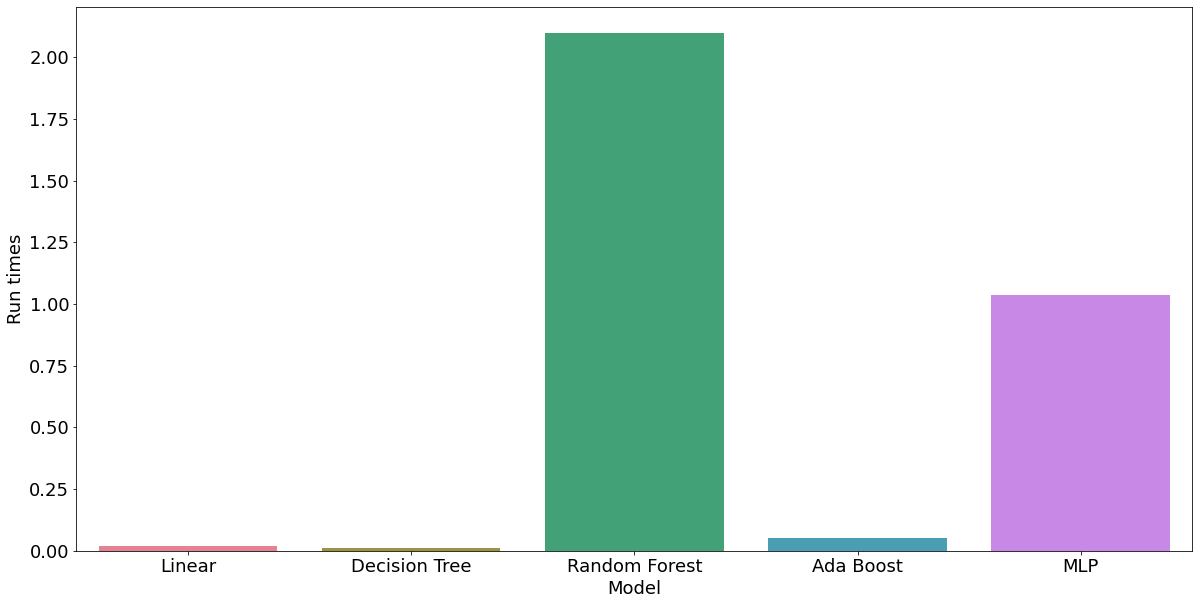

In [69]:
plt.figure(figsize=(20,10))
plt.xlabel('Model', fontsize=18)
plt.ylabel('Run Time (seconds)', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xticks(rotation='horizontal')

sns.barplot(data = run_times, x = 'Model', y = 'Run times', palette = 'husl')

Indeed, this seems to be the case. Nonethless, I would say that the Random Forest Regressor is still the best model to use on account of its accuracy. 


To conclude, I have managed to acheive my target of rebuilding the Spotify Popularity Algorithm, using and teting a handful of ML models. 

I'd like to take this further in a whole variety of ways, and had a hard time working out where to draw the line under this project. However, here are a few of the ways I'd like to carry this on:

- Exprimenting with standardising vs normalizing the data
- Investigating further the elements which impact popularity most
- Testing this model using songs that have just been released and monitoring my results against Spotify's scores, knowing that they mostly take into account client engagement rather than audio features.

Thanks for reading!